<a href="https://colab.research.google.com/github/Cloud-Dark/tugas-1_Kecerdasan_Komputasional/blob/main/Tes_data_absensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Cloud-Dark/tugas-1_Kecerdasan_Komputasional/main/Absenteeism_at_work.csv', delimiter=';')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df = data.drop(['Month of absence','ID', 'Seasons','Day of the week', 'Service time', 'Hit target', 'Disciplinary failure', 'Education','Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height'], axis=1)
df.head()

,Reason for absence,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Son,Body mass index,Absenteeism time in hours
0,26,289,36,33,239.554,2,30,4
1,0,118,13,50,239.554,1,31,0
2,23,179,51,38,239.554,0,31,2
3,7,279,5,39,239.554,2,24,4
4,23,289,36,33,239.554,2,30,2


In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,0:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.80493838,  1.01140838,  0.42955567, ...,  0.89372277,
         0.77593223, -0.21951111],
       [-2.28012426, -1.54437915, -1.12169354, ..., -0.01723432,
         1.00943766, -0.51976661],
       [ 0.44896961, -0.63266547,  1.44123994, ..., -0.92819141,
         1.00943766, -0.36963886],
       ...,
       [-2.28012426, -1.54437915, -1.05424792, ..., -0.01723432,
         1.70995395, -0.51976661],
       [-2.28012426,  0.14453308,  0.36211005, ...,  0.89372277,
         1.94345938, -0.51976661],
       [-2.28012426, -0.63266547,  1.03656623, ..., -0.01723432,
        -0.39159492, -0.51976661]])

In [5]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 2 1 0 2 0 1 2 1 1 1 1 2 2 1 2 2 2 1 0 2 0 1 1 0 1 2 1 2 2 1 1 1 2 0 1
 1 1 1 2 2 2 1 2 2 2 0 1 0 1 1 1 2 0 2 1 2 0 1 2 1 2 2 2 2 2 1 2 1 1 0 2 1
 1 0 1 0 0 1 3 3 3 3 0 2 3 0 3 2 3 3 3 1 3 3 0 0 1 2 2 1 1 1 2 0 1 1 1 0 2
 1 1 3 2 2 2 3 3 3 3 2 3 2 2 2 2 2 2 3 0 2 3 2 2 3 0 3 1 3 2 3 1 0 0 0 3 3
 3 3 3 0 0 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 2 0 3 0 3 3 0 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 0 3 0
 3 3 3 3 3 3 3 3 3 3 0 3 3 3 2 2 2 2 0 2 2 0 0 2 0 0 2 0 0 1 0 2 0 1 0 0 1
 0 1 1 2 2 1 1 2 1 0 2 2 2 0 1 1 0 1 0 2 1 2 0 1 1 2 1 0 0 2 0 1 0 0 2 1 2
 2 0 2 2 1 0 1 1 1 1 2 0 2 2 0 1 0 2 2 2 2 2 1 2 1 0 0 2 1 0 1 2 1 2 1 0 1
 2 1 1 0 0 2 1 2 2 1 2 1 1 2 2 2 2 1 2 1 1 1 2 2 0 3 2 3 3 3 0 0 3 2 3 3 2
 2 1 0 1 2 2 2 2 1 2 2 2 1 0 2 2 2 1 2 2 2 1 1 1 2 1 2 0 2 0 0 1 2 2 2 1 1
 2 2 0 1 1 2 1 0 0 1 0 2 2 2 0 1 2 2 1 1 0 2 2 0 1 2 2 1 1 0 2 2 1 2 2 2 2
 1 1 2 0 2 1 2 1 2 1 2 2 2 1 0 1 2 1 1 1 0 2 1 2 0 1 1 1 2 2 0 0 1 1 0 1 2
 2 1 2 0 1 0 2 2 0 1 1 2 

In [6]:
df["Clus_km"] = labels
df.head(500)

,Reason for absence,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Son,Body mass index,Absenteeism time in hours,Clus_km
0,26,289,36,33,239.554,2,30,4,0
1,0,118,13,50,239.554,1,31,0,2
2,23,179,51,38,239.554,0,31,2,2
3,7,279,5,39,239.554,2,24,4,1
4,23,289,36,33,239.554,2,30,2,0
...,...,...,...,...,...,...,...,...,...
495,28,246,25,41,261.756,0,23,1,1
496,28,246,25,41,261.756,0,23,1,1
497,28,118,10,37,261.756,0,28,3,2
498,23,155,12,34,261.756,2,25,2,2


In [7]:
df.groupby('Clus_km').mean()

,Reason for absence,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Son,Body mass index,Absenteeism time in hours
Clus_km,,,,,,,,
0,17.659864,321.068027,33.517007,34.462585,273.266299,1.353741,26.476190,8.680272
1,18.504673,241.046729,27.602804,37.172897,254.010383,1.504673,26.528037,6.098131
2,20.708333,156.848485,29.450758,37.602273,256.872420,0.386364,27.481061,6.303030
3,19.104348,205.173913,28.852174,35.000000,335.305104,1.139130,25.365217,7.643478


In [8]:
print (X[:, 0])

[26.  0. 23.  7. 23. 23. 22. 23. 19. 22.  1.  1. 11. 11. 23. 14. 23. 21.
 11. 23. 10. 11. 13. 28. 18. 25. 23. 28. 18. 23. 18. 18. 23. 18. 23. 23.
 24. 11. 28. 23. 23. 23. 23. 19. 23. 23. 23. 23. 22. 14.  0.  0. 23. 23.
  0.  0. 18. 23.  0. 23. 23. 23. 23. 23.  0. 23. 23. 23. 23. 23. 23. 23.
 23. 23. 19. 14. 28. 26. 23. 28. 23. 23. 13. 21. 23. 10. 22. 14. 23.  6.
 23. 21. 13. 28. 28. 28.  7. 23. 23. 19. 23. 26. 23. 26. 19. 22. 28. 28.
 23. 22. 27. 19. 23. 23. 19. 27. 18. 27. 23. 28. 27. 27. 27. 27. 27. 27.
 27. 27. 27. 18. 18. 27. 23. 27. 27. 23. 22. 23.  1. 11. 28. 23. 28. 22.
 11.  1. 28. 23. 23. 23. 25. 18. 23. 23. 19. 28. 19. 19. 17. 22. 13. 13.
 14. 13. 11.  1. 26. 13.  6.  8. 28. 23. 14. 13. 23. 11. 13. 11. 11. 13.
 14. 28. 14. 28. 28. 23. 28. 13. 23. 28. 28. 13. 23. 23. 14. 28. 28. 19.
 19. 12. 19. 13.  7.  0. 13. 28. 28. 18. 19.  7. 28. 12. 13.  0.  0.  0.
  0. 11. 13. 22. 19. 22. 10. 23. 10. 11. 23. 10. 13. 13. 23. 13. 22. 11.
 28. 28. 19.  1.  5. 26. 26. 18. 25.  1.  1. 25. 22

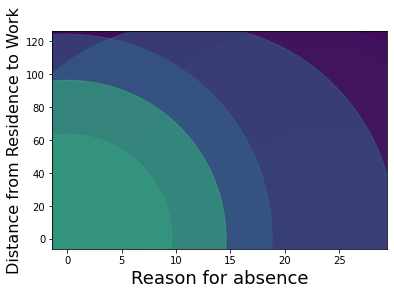

In [9]:
area =np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 7], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Reason for absence', fontsize=18)
plt.ylabel('Distance from Residence to Work', fontsize=16)

plt.show()

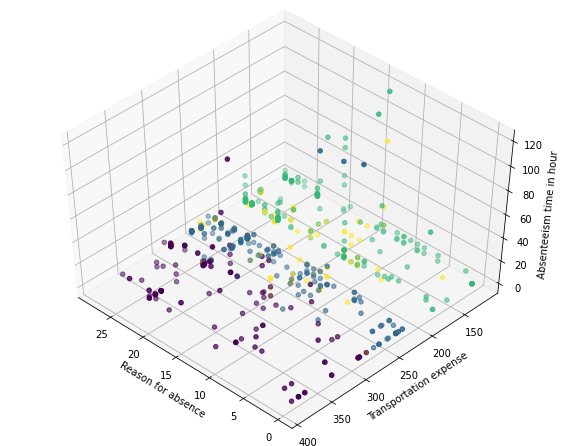

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Reason for absence')
ax.set_ylabel('Transportation expense')
ax.set_zlabel('Absenteeism time in hour')

ax.scatter(X[:, 0], X[:, 1], X[:, 7], c= labels.astype(float))

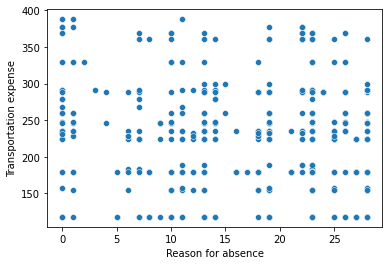

In [11]:
sns.scatterplot(x =df['Reason for absence'],y = df['Transportation expense'])

Silhouette Score(n=3): 0.3237780828492801


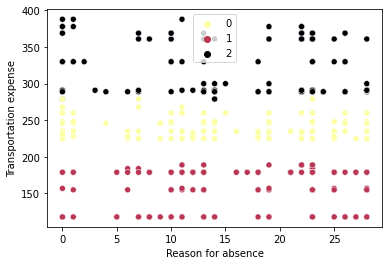

In [12]:
KMean= KMeans(n_clusters=3)
KMean.fit(df)
label=KMean.predict(df)
print(f'Silhouette Score(n=3): {silhouette_score(df, label)}')
sns.scatterplot(x = df['Reason for absence'], y = df['Transportation expense'],hue=label,palette='inferno_r')

In [13]:
#Use silhouette score
range_n_clusters = list (range(2,7))
print ("Number of clusters from 2 to 7: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 7: 
 [2, 3, 4, 5, 6]
For n_clusters = 2, silhouette score is 0.39642601834557417)
For n_clusters = 3, silhouette score is 0.3237780828492801)
For n_clusters = 4, silhouette score is 0.38282265276269906)
For n_clusters = 5, silhouette score is 0.3703370443289644)
For n_clusters = 6, silhouette score is 0.3884204467044555)


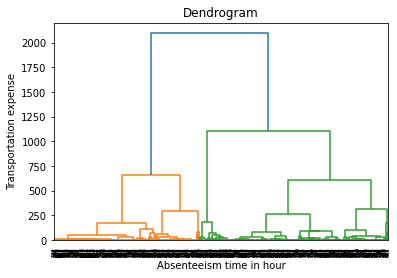

In [14]:
X = df.iloc[:, [7, 1]].values
 
# Menggunakan dendrogram untuk menentukan angka cluster yang tepat
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Absenteeism time in hour')
plt.ylabel('Transportation expense')
plt.show()

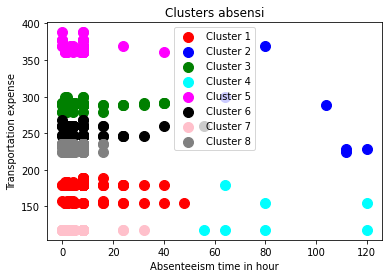

In [15]:
# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualisasi hasil clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'pink', label = 'Cluster 7')
plt.scatter(X[y_hc == 7, 0], X[y_hc == 7, 1], s = 100, c = 'grey', label = 'Cluster 8')
plt.title('Clusters absensi')
plt.xlabel('Absenteeism time in hour')
plt.ylabel('Transportation expense')
plt.legend()
plt.show()